In [1]:
pip install control

In [2]:
import control
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# Define transfer function of the system
s = control.tf('s')

# Process

In [4]:
K1 = 5.0
T1 = 5.0

In [5]:
P1 = K1/(T1*s+1)

In [6]:
K2 = 2.0
T2 = 1.0

In [7]:
P2 = K2/(T2*s+1)

In [8]:
Process = control.parallel(P1, -P2)

In [9]:
OpenLoop = Process
Poles = control.poles(OpenLoop)
Poles

array([-1. +0.j, -0.2+0.j])

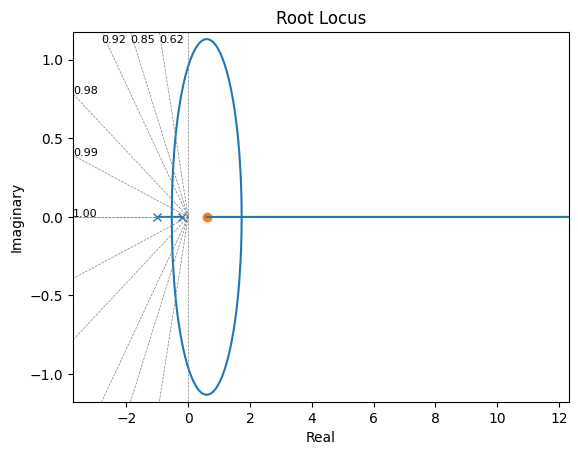

In [10]:
roots, gains = control.root_locus(OpenLoop)

In [11]:
gm, pm, sm, wpc, wgc, wms = control.stability_margins(OpenLoop)

In [12]:
#Gain margin
gm

1.2000000000000002

In [13]:
#Phase margin
pm

17.757808006846318

In [14]:
#Stability margin, the minimum distance from the Nyquist plot to -1
sm

0.14533428856583427

In [15]:
#Phase crossover frequency (where phase crosses -180 degrees), which is associated with the gain margin.
wpc

0.9591663046625439

In [16]:
#Gain crossover frequency (where gain crosses 1), which is associated with the phase margin.
wgc

0.7389444281699377

In [17]:
#Stability margin frequency (where Nyquist plot is closest to -1)
wms

0.8989166649027075

### Ganho Limite / Crítico

In [18]:
#Gain margin
Kcr = gm
Kcr

1.2000000000000002

## Calcular o período de oscilação por frequência de cruzamento de fase

In [19]:
#Phase crossover frequency (where phase crosses -180 degrees), which is associated with the gain margin.
fKu = wpc/(2*math.pi)
Tcr = 1/fKu
Tcr

6.550673513692863

## PI Controller - ZIEGLER e NICHOLS - Método 2

In [20]:
Kc = 0.45*Kcr
Kc

0.5400000000000001

In [21]:
ti= Tcr/1.2
ti

5.458894594744053

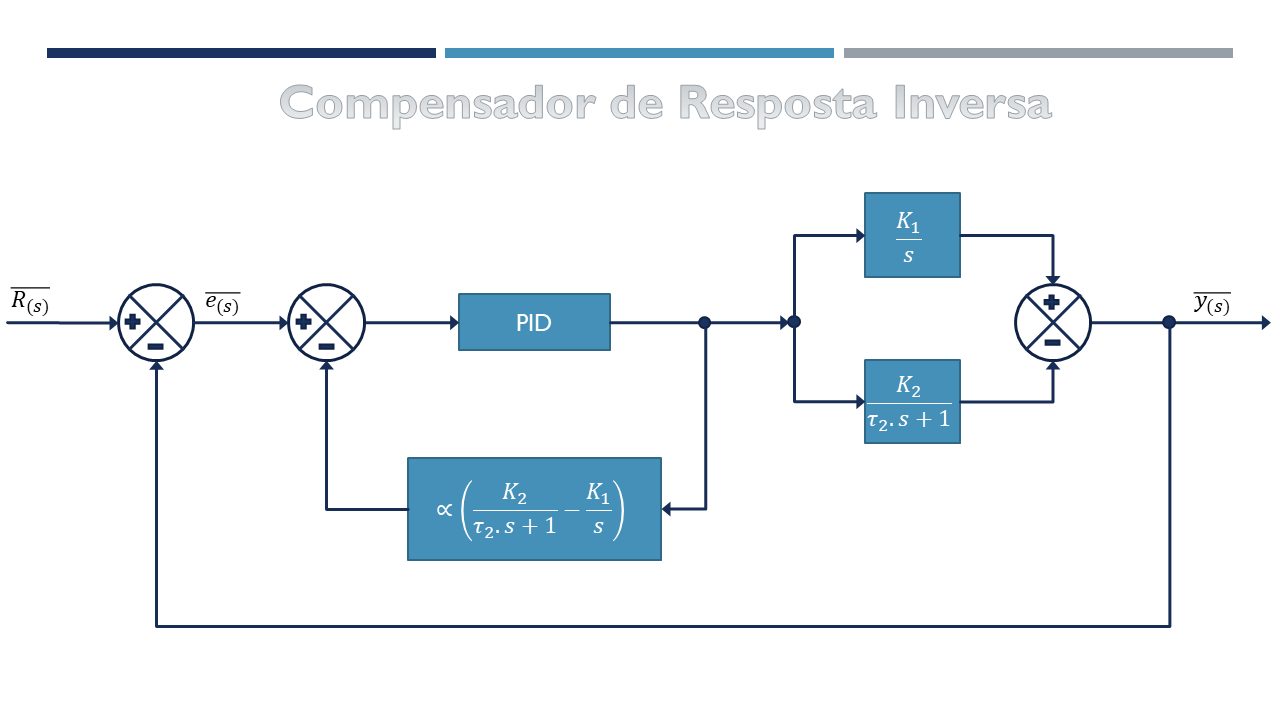

## Inner Level

In [22]:
# Define transfer function of the PID Controller
PIDControl = Kc *(1 + (1/(ti*s)))

In [23]:
AlfaEstimado = (K2*T1 - K1*T2)/(T1-T2)
AlfaEstimado

1.25

In [24]:
Alfa = AlfaEstimado

In [25]:
Compensador = Alfa * control.parallel(K2/(T2*s+1), -K2/(T1*s+1))
Compensador

TransferFunction(array([10.,  0.]), array([5., 6., 1.]))

In [26]:
Inner_Loop = control.feedback(PIDControl, Compensador, sign=-1)

## Outer Level

In [27]:
Outer = control.series(Inner_Loop,Process)

In [28]:
Outer_Loop = control.feedback(Outer, 1, sign=-1)

## System Step Response

In [29]:
t, y = control.step_response(Outer_Loop)

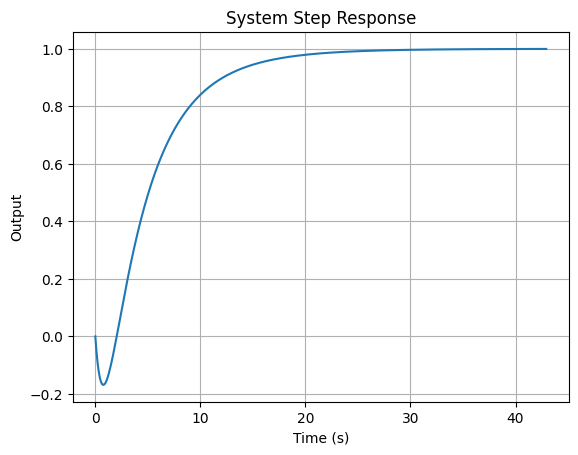

In [30]:
# Plot step response
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()